# Выпускная квалификационная работа 

### Автор: Петрова Екатерина Андреевна.
### Группа: ПИ19-4.
### Тема: Методы машинного обучения в задачах кредитного скоринга 

#### Импортирую все необходимые модули

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn import metrics
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

#### Считываю датасет, который я буду использовать в работе

In [2]:
df = pd.read_csv("mydata.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape #Размерность обучающего датасета

(614, 13)

#### Вывожу информацию

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

#### Проверяю наличие пустых значений

In [6]:
print(df.isnull().sum())

if sum(df.isnull().sum()) == 0:
    print("NAN в заданном датасете отсутствуют!")
else: 
    print("Внимание! NAN в заданном датасете присутствуют!")

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Внимание! NAN в заданном датасете присутствуют!


In [7]:
df.describe() #Описательная статистика

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.corr() #Коррелляция

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


#### Заменяю значения признаков на числовые

In [9]:
df = df.replace({'Gender' : {"Male" : 0, "Female" : 1}, 
                 'Married' : {"No" : 0, "Yes" : 1},
                 'Education' : {"Not Graduate" : 0, "Graduate" : 1},
                 'Self_Employed' : {"No" : 0, "Yes" : 1},
                 'Property_Area' : {"Urban" : 0, "Rural" : 1, "Semiurban" : 2},
                 'Loan_Status' : {"Y" : 0, "N" : 1},
                 'Dependents' : {"3+" : 3},
                })
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,0,0
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,1
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,0,0
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,0
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,1,0
610,LP002979,0.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,1,0
611,LP002983,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,0,0
612,LP002984,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,0,0


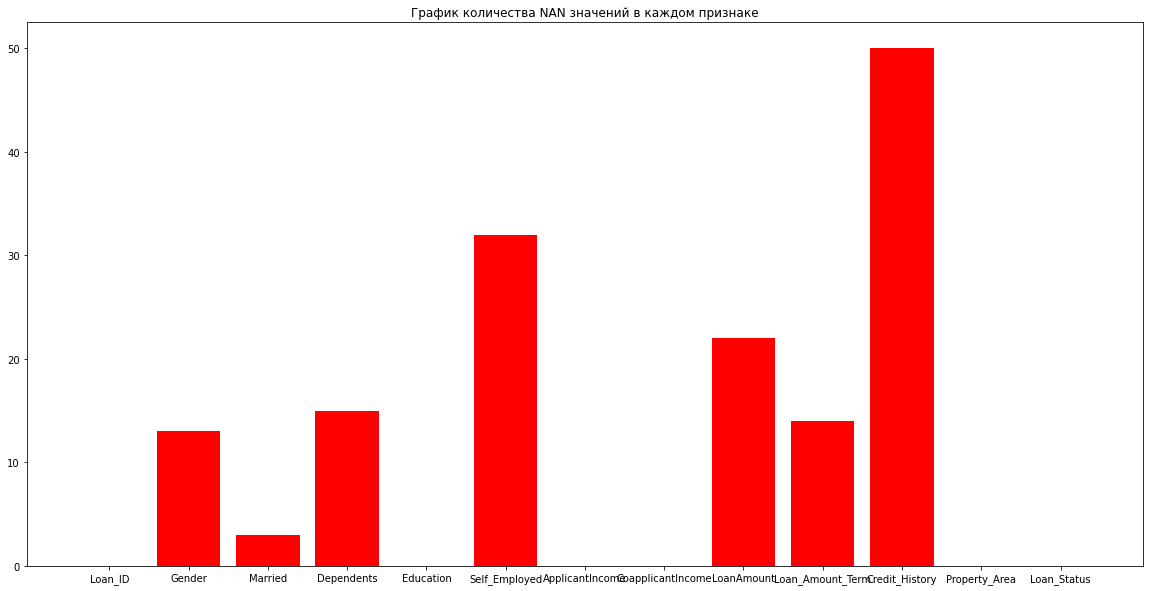

In [10]:
plt.figure(figsize=(20, 10))

data_col =  df.columns

null_values = df.isnull().sum()

plt.bar(data_col, null_values, color = "red")
plt.title("График количества NAN значений в каждом признаке");

In [11]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Married"].fillna(df["Married"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].mode()[0], inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace=True)

In [12]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,120.0,360.0,1.0,0,0
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,1
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,0,0
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,0
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,1,0
610,LP002979,0.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,1,0
611,LP002983,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,0,0
612,LP002984,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,0,0


In [13]:
print(df.isnull().sum())

if sum(df.isnull().sum()) == 0:
    print("NAN в заданном датасете отсутствуют!")
else: 
    print("Внимание! NAN в заданном датасете присутствуют!")

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
NAN в заданном датасете отсутствуют!


#### Построение корреляционной матрицы.

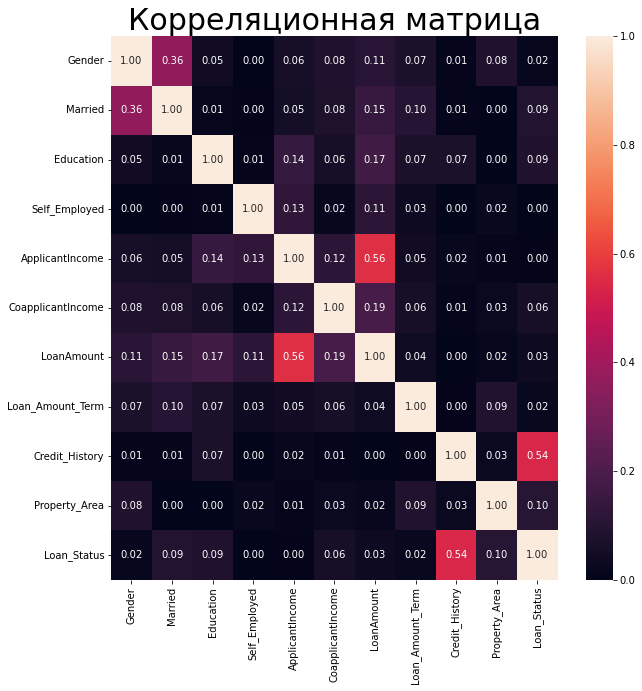

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs(), vmin=0, vmax=1, annot=True, fmt=".2f")
plt.title('Корреляционная матрица', fontsize=30)
plt.show()

#### Построение эмпирического распределения каждого существенного признака;


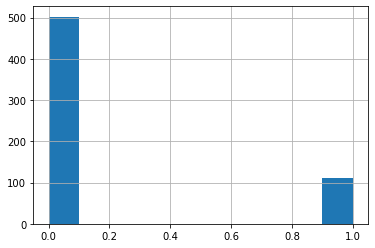

In [43]:
h = df["Gender"].hist()
fig = h.get_figure()

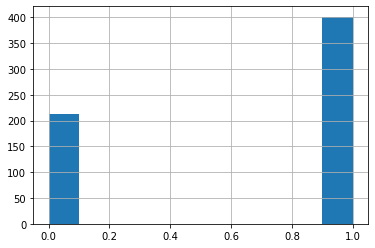

In [44]:
h = df["Married"].hist()
fig = h.get_figure()

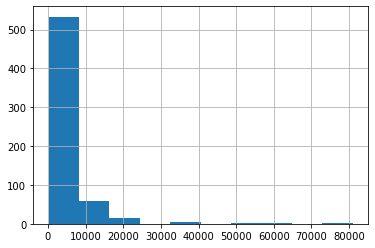

In [46]:
h = df["ApplicantIncome"].hist()
fig = h.get_figure()

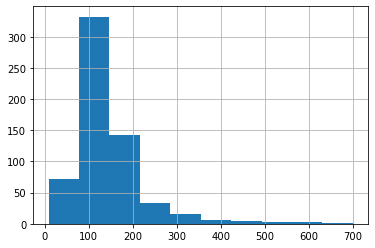

In [47]:
h = df["LoanAmount"].hist()
fig = h.get_figure()

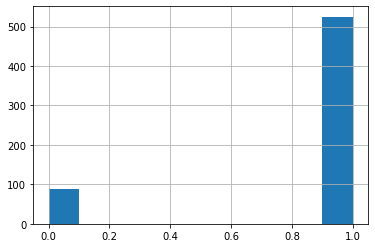

In [48]:
h = df["Credit_History"].hist()
fig = h.get_figure()

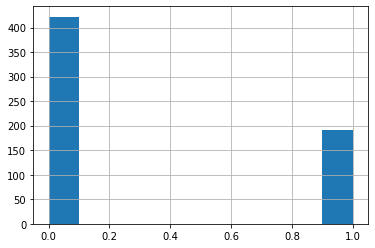

In [49]:
h = df["Loan_Status"].hist()
fig = h.get_figure()

#### Удаляю ненужные колонки

In [15]:
df = df.drop(columns=['Loan_ID', 'Loan_Amount_Term', 'Property_Area'])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,120.0,1.0,0
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,1.0,1
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,1.0,0
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,1.0,0
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0,1,0.0,2900,0.0,71.0,1.0,0
610,0.0,1.0,3,1,0.0,4106,0.0,40.0,1.0,0
611,0.0,1.0,1,1,0.0,8072,240.0,253.0,1.0,0
612,0.0,1.0,2,1,0.0,7583,0.0,187.0,1.0,0


#### Распределение целевого признака

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

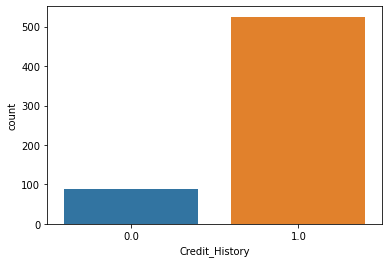

In [50]:
sns.countplot(x=df["Credit_History"])

#### Построение совместного распределения каждого признака и целевой переменной

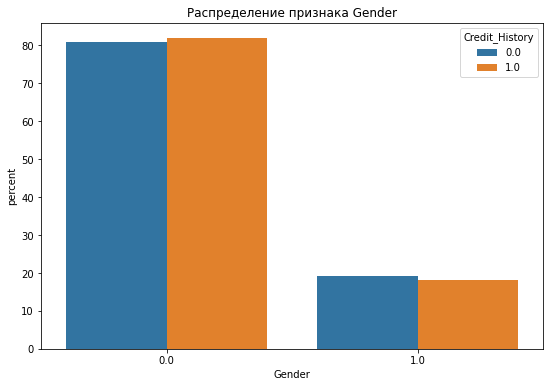

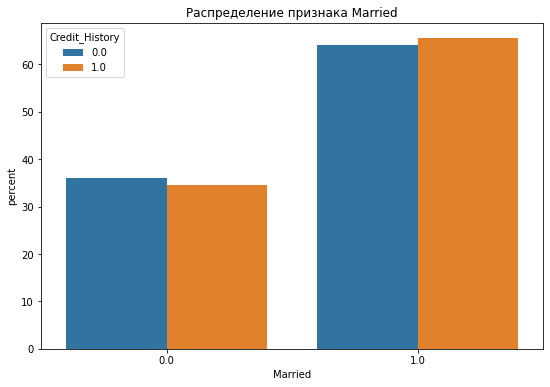

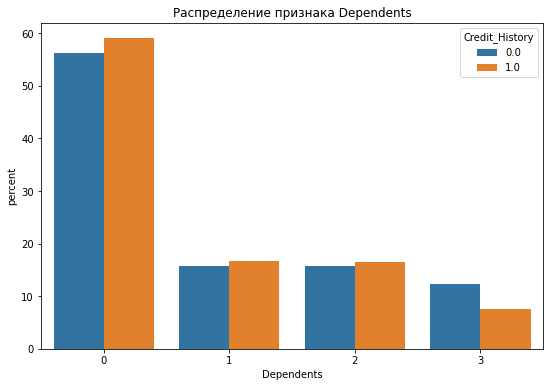

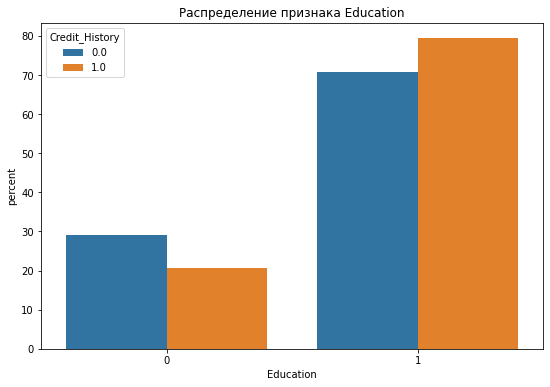

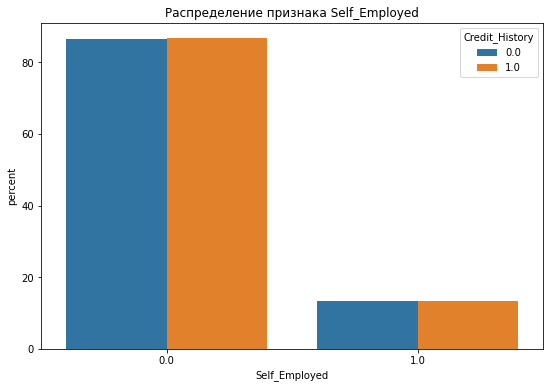

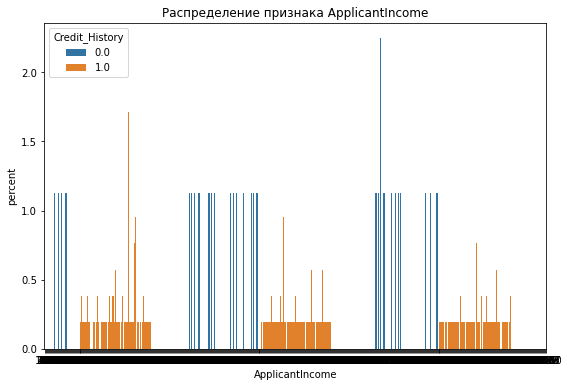

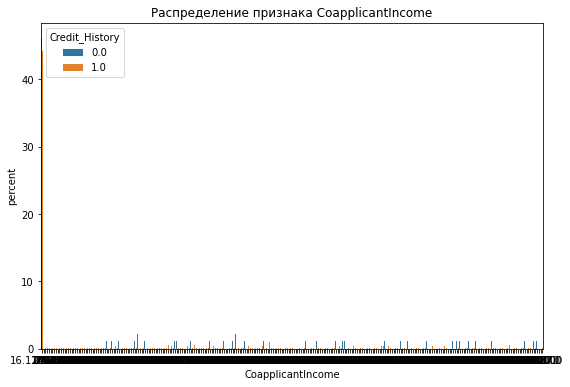

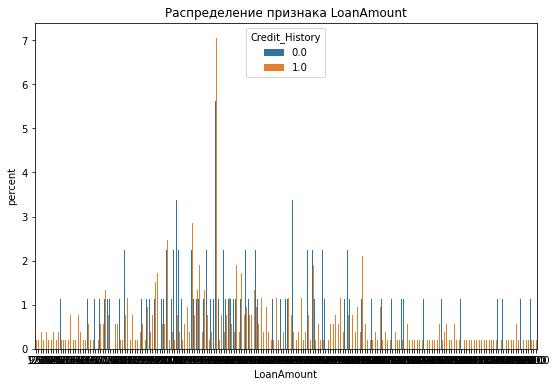

In [64]:
for col in df.columns[:8]:
    plt.figure(figsize=(9, 6))
    prop_df = df[col].groupby(df["Credit_History"]).value_counts(normalize=True).rename("percent").reset_index()
    prop_df["percent"] *= 100
    sns.barplot(x=col, y="percent", hue="Credit_History", data=prop_df)
    plt.title(f"Распределение признака {col}")

#### Выделяю целевую переменную и факторы
#### Затем разделяю данные на обучающую и тестовую выборки, создаю специальные функции

In [16]:
Y = df['Credit_History']
X = df.drop(['Credit_History'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

In [17]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,120.0,0
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,1
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,0
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,0
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,0
...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0,1,0.0,2900,0.0,71.0,0
610,0.0,1.0,3,1,0.0,4106,0.0,40.0,0
611,0.0,1.0,1,1,0.0,8072,240.0,253.0,0
612,0.0,1.0,2,1,0.0,7583,0.0,187.0,0


In [18]:
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

#### Размерности обучающей и тестовой выборки:

In [19]:
x_train.shape, y_train.shape

((491, 9), (491,))

In [20]:
x_test.shape, y_test.shape

((123, 9), (123,))

#### Функция для отображения матрицы ошибок

In [27]:
def ConfusionMatrix(y_pred):
    
    conf_matrix = confusion_matrix(y_test, y_pred)

    group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]

    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap="YlGnBu")

    ax.set_title('Матрица ошибок\n', fontsize = 30)
    
    ax.set_xlabel('\nПредсказанные значения', fontsize = 20)
    
    ax.set_ylabel('Реальные значения', fontsize = 20)
    
    ax.xaxis.set_ticklabels([0,1])
    
    ax.yaxis.set_ticklabels([0,1])

#### Функция для отображения метрик: 

In [28]:
def Metrics(y_pred):
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1: {f1_score(y_test, y_pred)}')

#### Построение эмпирического распределения каждого существенного признака;

    Ось x - значения

    Ось y - частота повторов значений

#### Распределение целевого признака

#### Построение совместного распределения каждого признака и целевой переменной

## Начнем строить модели
# Логистическая регрессия

In [29]:
%%time 
logreg_model = LogisticRegression(max_iter=300)
logreg_model.fit(x_train, y_train)
logreg_prediction = logreg_model.predict(x_test)
Metrics(logreg_prediction)

Accuracy: 0.8292682926829268
Precision: 0.8632478632478633
Recall: 0.9528301886792453
F1: 0.9058295964125562
CPU times: total: 1.25 s
Wall time: 1.91 s


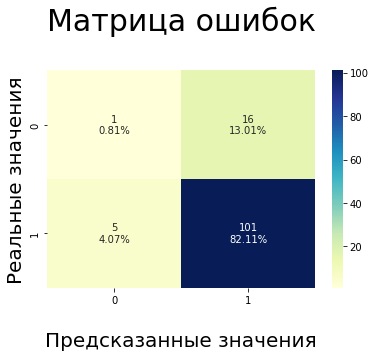

In [30]:
ConfusionMatrix(logreg_prediction)

# Метод опорных векторов (SVC)

In [31]:
%%time 
SVC_model = SVC()
SVC_model.fit(x_train, y_train)
y_pred_SVC_prediction = SVC_model.predict(x_test)
Metrics(y_pred_SVC_prediction)

Accuracy: 0.8617886178861789
Precision: 0.8617886178861789
Recall: 1.0
F1: 0.925764192139738
CPU times: total: 46.9 ms
Wall time: 432 ms


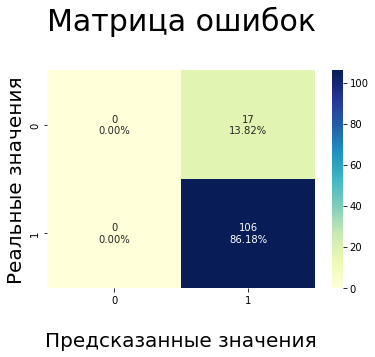

In [32]:
ConfusionMatrix(y_pred_SVC_prediction)

# Модель RidgeClassifier

In [33]:
%%time
ridge_model = RidgeClassifier(class_weight = 'balanced')
ridge_model.fit(x_train, y_train)
ridge_prediction = ridge_model.predict(x_test)
Metrics(ridge_prediction)

Accuracy: 0.8048780487804879
Precision: 0.9880952380952381
Recall: 0.7830188679245284
F1: 0.8736842105263158
CPU times: total: 641 ms
Wall time: 842 ms


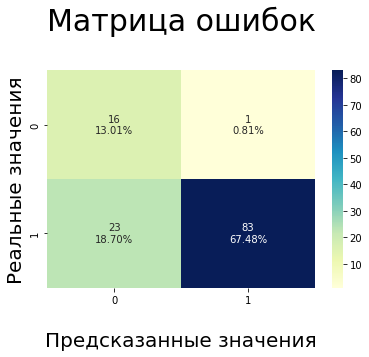

In [34]:
ConfusionMatrix(ridge_prediction)

# Метод k ближайших соседей (KNeighborsClassifier)

In [35]:
%%time 
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train, y_train)
y_pred_KNN_prediction = KNN_model.predict(x_test)
Metrics(y_pred_KNN_prediction)

Accuracy: 0.8536585365853658
Precision: 0.860655737704918
Recall: 0.9905660377358491
F1: 0.9210526315789475
CPU times: total: 78.1 ms
Wall time: 401 ms


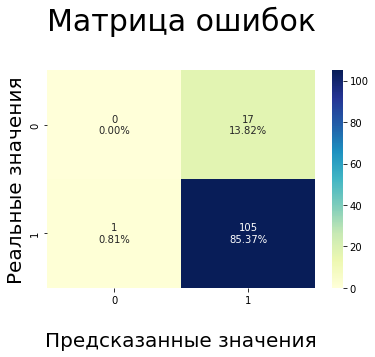

In [36]:
ConfusionMatrix(y_pred_KNN_prediction)

# Многослойный перцептрон (MLP)

In [37]:
%%time
MLP_model = MLPClassifier()
MLP_model.fit(x_train, y_train)
MLP_prediction = MLP_model.predict(x_test)
Metrics(MLP_prediction)

Accuracy: 0.7317073170731707
Precision: 0.9101123595505618
Recall: 0.7641509433962265
F1: 0.8307692307692307
CPU times: total: 906 ms
Wall time: 565 ms


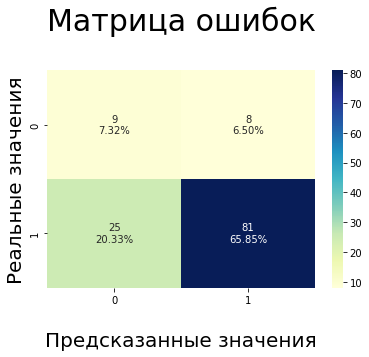

In [38]:
ConfusionMatrix(MLP_prediction)

# Дерево решений

In [39]:
%%time 
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
y_pred_tree_prediction = tree_model.predict(x_test)
Metrics(y_pred_tree_prediction)

Accuracy: 0.8211382113821138
Precision: 0.9038461538461539
Recall: 0.8867924528301887
F1: 0.8952380952380953
CPU times: total: 15.6 ms
Wall time: 322 ms


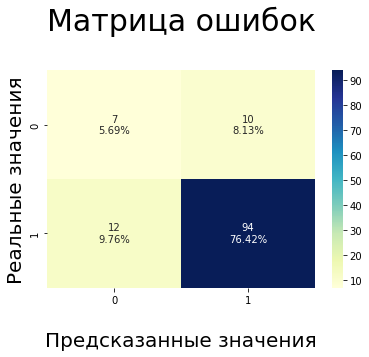

In [40]:
ConfusionMatrix(y_pred_tree_prediction)

# Случайный лес

In [41]:
%%time
forest_model = RandomForestClassifier()  
forest_model.fit(x_train, y_train)
forest_prediction = forest_model.predict(x_test)
Metrics(forest_prediction)

Accuracy: 0.8699186991869918
Precision: 0.9166666666666666
Recall: 0.9339622641509434
F1: 0.9252336448598131
CPU times: total: 172 ms
Wall time: 456 ms


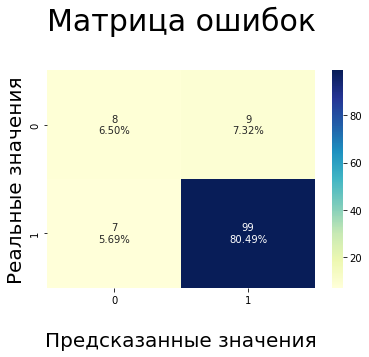

In [42]:
ConfusionMatrix(forest_prediction)